# Basic Stock Analysis
##### Roger Qiu - 8/30/2022
### Introduction
In this project we will build a basic stock analysis model that analyzes and visualizes 3 hotel stocks: Marriott (M), Hilton (HLT) and Hyatt (H). We will use pandas to model and clean the data, numpy for the statistical analysis and matplotlib for the visualizations.

We will creating the following visualizations:

- A comparison of closing prices over time
- daily simple rate of return
- Mean rates of return over the last year
- Standard deviations of the returns over the last year

### The Data
To begin, let's load and inspect our data that we loaded from pandas datareader

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# data reader allows us to extract stock data from the web
import pandas_datareader as web

In [31]:
# create our list of ticker symbols
symbols = ['MAR','HLT','H']

# create our date range
from datetime import datetime
start_date = datetime(2021,8,1)
end_date = datetime(2022,8,1)

# create our stock data variable that takes the symbols with the start and end date
stock_data = web.get_data_yahoo(symbols,start_date,end_date)

# lets inspect the stock data
print(stock_data) 
# our stock data includes each stocks: Adj close (close after corporate actions like dividends and splits), close (raw), high of the date, low, open and volume.

Attributes   Adj Close                              Close              \
Symbols            MAR         HLT          H         MAR         HLT   
Date                                                                    
2021-08-02  144.342957  127.580681  77.370003  144.869995  127.870003   
2021-08-03  142.111130  125.794731  75.800003  142.630005  126.080002   
2021-08-04  137.468079  124.108551  72.900002  137.970001  124.389999   
2021-08-05  141.204437  126.114006  74.889999  141.720001  126.400002   
2021-08-06  141.074905  126.373421  75.480003  141.589996  126.660004   
...                ...         ...        ...         ...         ...   
2022-07-26  150.767426  120.084717  79.180000  151.039993  120.220001   
2022-07-27  157.315598  129.104553  83.059998  157.600006  129.250000   
2022-07-28  157.804703  127.855965  82.779999  158.089996  128.000000   
2022-07-29  158.533401  127.925896  82.750000  158.820007  128.070007   
2022-08-01  159.282043  128.545197  83.589996  159.

### Visualizations
Now that we have our stock data, lets begin creating the visualizations

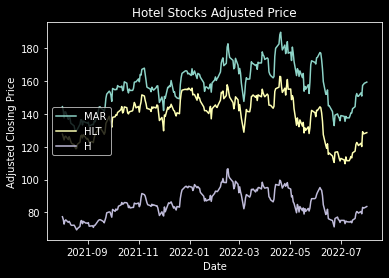

In [32]:
# for each of the 3 ticker symbols, plot the adjusted close 
for symbol in symbols:
    plt.plot(stock_data['Adj Close'][symbol])
    
# create axis labels and legend
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Hotel Stocks Adjusted Price")
plt.legend(symbols,loc = 6)
plt.show()

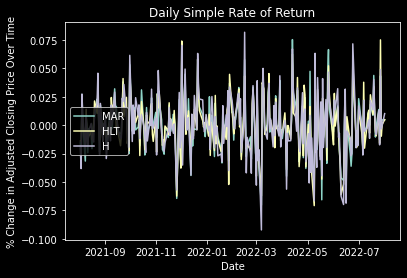

In [51]:
# for each ticker symbol, plot the percentage change of the adjusted close by day
for symbol in symbols:
    plt.plot(stock_data['Adj Close'][symbol].pct_change())
plt.xlabel("Date")
plt.ylabel("% Change in Adjusted Closing Price Over Time")
plt.title("Daily Simple Rate of Return")
plt.legend(symbols,loc = 6)
plt.show()

       MAR     HLT         H
0  0.00066  0.0003  0.000649
MAR    0.000660
HLT    0.000300
H      0.000649
Name: 0, dtype: float64


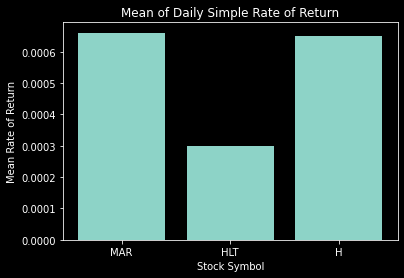

In [59]:
# create a new dataframe which stores the mean rate of return of each stock
mean_rate_of_return = pd.DataFrame()

# for each ticker symbol, create a new column in mean_rate_of_return that calculates the mean of the percentage of daily returns
for symbol in symbols: 
    mean_rate_of_return[symbol] = [stock_data['Adj Close'][symbol].pct_change().mean()] 
print(mean_rate_of_return) 

# now lets use iloc[0] to convert the mean rate into a vertical df
print(mean_rate_of_return.iloc[0])

# plot the bar chart of the mean rate of returns
plt.bar(symbols,mean_rate_of_return.iloc[0]) 
plt.xlabel("Stock Symbol")
plt.ylabel("Mean Rate of Return")
plt.title("Mean of Daily Simple Rate of Return")
plt.show()

        MAR       HLT         H
0  0.023203  0.023299  0.026152


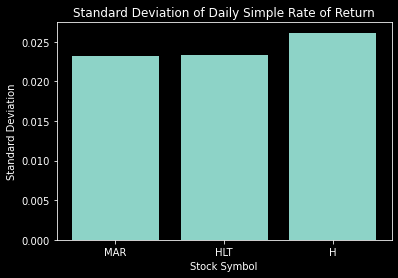

In [62]:
# create a new dataframe which stores the standard deviation of return of each stock
stddev_rate_of_return = pd.DataFrame() 

# for each ticker symbol, create a new column in stddev_rate_of_return that calculates the standard deviation of daily returns for each stock
for symbol in symbols:
    stddev_rate_of_return[symbol] = [stock_data['Adj Close'][symbol].pct_change().std()]

# print out the results
print(stddev_rate_of_return) 

# plot the bar chart of the standard deviation of returns
plt.bar(symbols,stddev_rate_of_return.iloc[0]) # creates a bar graph of standard deviation of rates of return for all 5 stocks
plt.xlabel("Stock Symbol")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Daily Simple Rate of Return")
plt.show()

### Conclusion
Using Pandas for data manipulation, numpy for statsitical analysis and matplotlib for visualizations, we are able to see that: 
- Marriott is the most expensive stock, with all 3 prices having correlated movement.
- Hyatt seemingly has the highest change of daily stock prices.
- Hilton has lower rate of returns than both Marriott and Hyatt who are tied.
- Hyatt finally has a higher daily standard deviation of rate of return.